# Cargando las librerias requeridas

In [7]:
import numpy as np
import pandas as pd
from plotnine import *

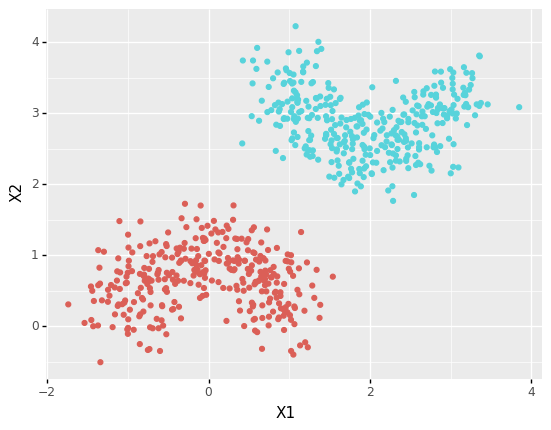

In [8]:
#Generando dos lunas separables entre si
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

tempData=make_moons(n_samples=1000,shuffle=True, noise=0.3, random_state=10)
tempData[0][tempData[1]==1,1]=tempData[0][tempData[1]==1,1]+3
tempData[0][tempData[1]==1,0]=tempData[0][tempData[1]==1,0]+1

X_train, X_test, y_train, y_test = train_test_split(tempData[0],tempData[1], test_size=0.33, random_state=42)
tempDF=pd.DataFrame(X_train,columns=["X1","X2"])
tempDF["color"]=y_train.astype("str")
print(ggplot(tempDF)+aes(x="X1", y="X2",color="color")+ geom_point(show_legend=False))


# Clase SVC

La clase SVC del módulo sklearn.SVM nos permite implementar un modelo de support vector machine<br>
SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, probability=False, tol=0.001,max_iter=- 1, decision_function_shape='ovr', random_state=None)<br>
Parámetros
* C: valor entero correspondiente al parámetro de penalización.
* kernel: tipo de kernel a utilizar entre ‘linear’ (lineal), ‘poly’ (polinomial), ‘rbf’ (radiobasal), ‘sigmoid’ (sigmoide), ‘precomputed’ (definido por el usuario).
* degree: grado del kernel polinomial (se ignora para otros kernels).
* gamma: coeficiente del kernel para ‘rbf’, ‘poly’ y ‘sigmoid’.
* coef0: termino independiente de los kernels ‘poly’ y ‘sigmoid’.
* probability: valor booleano, dejar en verdadero si se quiere usar probabilidades.
* tol: tolerancia de finalización para el algoritmo (recordar que es un problema de optimización)
* max_iter: máximo número de iteraciones.
* decision_function_shape: en caso de múltiples clases si se utiliza un esquema "ovr" (one versus the rest), o "ovo" (one versus one). 
* random_state: para replicar un experimento.<br>

<br>Atributos
* classes_: las etiquetas de las clases.
* fit_status_: 1 en caso que el modelo no se ajusto bien, 0 en caso contrario.
* support_: índice de los vectores de soporte.
* support_vectors_: los vectores de soporte.
* n_support_: número de vectores de soporte para cada clase.<br>

<br>métodos/funciones
* decision_function(X): evalua la frontera de decisión para los puntos X.
* fit(X, y): "Entrenamiento" del modelo, se tiene que dar los datos y la clase Y
* predict(X): predice las etiquetas para los puntos dados
* predict_proba(X): predice las probabilidades de las clases para los puntos dados
* predict_log_proba(X): predice el logaritmo de las probabilidades de las clases para los puntos dados (mayor estabilidad)

In [13]:
#Creando un SVM con las condiciones iniciales
from sklearn.svm import SVC
SVM = SVC(probability=True,C=999,kernel="linear")
SVM = SVM.fit(X_train,y_train)

#Aplicando el modelo a otros datos
resultado=SVM.predict(X_test)
print("Resultado de la predicción:\n",resultado)
print("Resultado original:\n",y_test)

#Aplicando el modelo a otros datos
resultado=SVM.predict_proba(X_test)
print("Resultado de la predicción:\n",resultado[:10])



Resultado de la predicción:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 1 2 1 2]
Resultado original:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2]
Resultado de la predicción:
 [[6.81596040e-03 9.30968444e-01 6.22155957e-02]
 [9.42283825e-01 3.88445020e-02 1.88716732e-02]
 [1.11456611e-03 4.27284246e-04 9.98458150e-01]
 [1.37260748e-02 8.20406912e-01 1.65867013e-01]
 [8.97165218e-03 8.22793825e-01 1.68234523e-01]
 [9.41609566e-01 4.02061937e-02 1.81842404e-02]
 [5.06978611e-02 9.27701358e-01 2.16007805e-02]
 [1.64963807e-02 3.11975962e-02 9.52306023e-01]
 [1.98885221e-02 5.69514238e-01 4.10597240e-01]
 [2.41076084e-02 9.55293416e-01 2.05989759e-02]]


# Visualización de Support Vector Machine
Para visualizar SVM tenemos que graficar los vectores de soporte y determinar la frontera de decisión.

/usr/local/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names


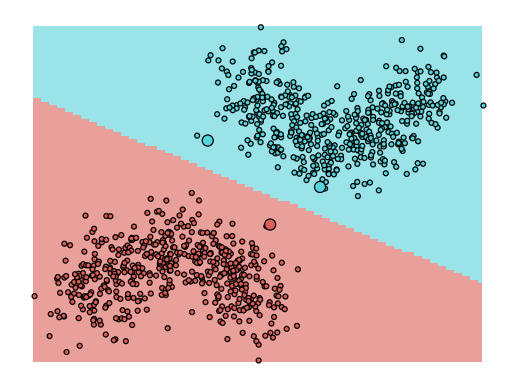


[305 326 572]


In [23]:
#Visualización SVM clases separables
#Generando dos lunas
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons
tempData=make_moons(n_samples=1000,shuffle=True, noise=0.3, random_state=10)
tempData[0][tempData[1]==1,1]=tempData[0][tempData[1]==1,1]+3
tempData[0][tempData[1]==1,0]=tempData[0][tempData[1]==1,0]+1
#tempData[0][0,:]=[-1.5,2.5] #Agregando un punto para molestar (descomentar)
#tempData[0][0,:]=[-1.5,1.8] #Agregando un punto para molestar (descomentar)

#Entrenando el modelo y aplicando a una grilla de puntos para su visualización
SVM = SVC(C=99,kernel="linear") #Jugar con valores de 0.1 a 99 de C
#SVM = SVC(C=0.001,kernel="linear") #Jugar con valores de 0.1 a 99 de C
SVM = SVM.fit(tempData[0],tempData[1])

#Creando una grilla de evaluación
x = np.arange(tempData[0][:,0].min(),tempData[0][:,0].max(), 0.05)
y = np.arange(tempData[0][:,1].min(),tempData[0][:,1].max(),0.05)
temp = np.meshgrid(x, y)
dataTest=pd.DataFrame(temp[0].flatten(),columns=["X1"])
dataTest.insert(1,"X2",temp[1].flatten())

#Prediciendo y graficando el output
claseEstimada=SVM.predict(dataTest.iloc[:,0:2])

#Creando el dataframe a graficar
dataTest.insert(2, "ClassOutput", claseEstimada.astype("str"))

#Generating the plot with ggplot/plotnine
tempDF=pd.DataFrame(tempData[0],columns=["X1","X2"])
tempDF['Class']=tempData[1].astype("str")
tempDF2=pd.DataFrame(tempData[0][SVM.support_,:],columns=["X1","X2"])
tempDF2['Class']=tempData[1][SVM.support_].astype("str")
pp=(ggplot()+aes(x="X1",y="X2")+theme_void()
  +geom_tile(aes(fill="ClassOutput"),data=dataTest,alpha=0.6,show_legend=False)
  +geom_point(aes(fill="Class"),data=tempDF,show_legend=False,color="black")
  +geom_point(aes(fill="Class"),data=tempDF2,show_legend=False,color="black",size=4)    
)

print(pp)
print(SVM.support_)

# Visualización aplicando kernels

/usr/local/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names


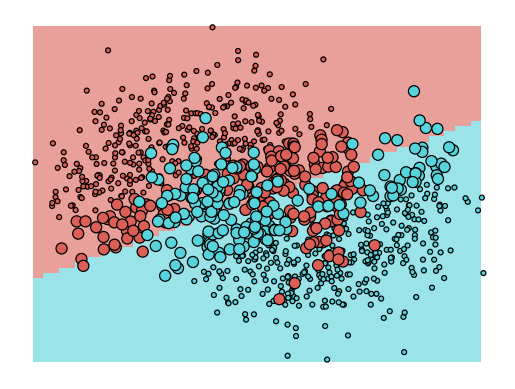

In [24]:
#Visualización SVM clases separables
#Generando dos lunas
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons
from sklearn.svm import SVC
tempData=make_moons(n_samples=1000,shuffle=True, noise=0.3, random_state=6)

#Entrenando el modelo y aplicando a una grilla de puntos para su visualización
SVM = SVC(C=1,kernel="linear")
#SVM = SVC(C=0.1,kernel="rbf")
SVM = SVM.fit(tempData[0],tempData[1])

#Creando una grilla de evaluación
x = np.arange(tempData[0][:,0].min(),tempData[0][:,0].max(), 0.05)
y = np.arange(tempData[0][:,1].min(),tempData[0][:,1].max(),0.05)
temp = np.meshgrid(x, y)
dataTest=pd.DataFrame(temp[0].flatten(),columns=["X1"])
dataTest.insert(1,"X2",temp[1].flatten())

#Prediciendo y graficando el output
claseEstimada=SVM.predict(dataTest.iloc[:,0:2])

#Creando el dataframe a graficar
dataTest.insert(2, "ClassOutput", claseEstimada.astype("str"))

#Generating the plot with ggplot/plotnine
tempDF=pd.DataFrame(tempData[0],columns=["X1","X2"])
tempDF['Class']=tempData[1].astype("str")
tempDF2=pd.DataFrame(tempData[0][SVM.support_,:],columns=["X1","X2"])
tempDF2['Class']=tempData[1][SVM.support_].astype("str")
pp=(ggplot()+aes(x="X1",y="X2")+theme_void()
  +geom_tile(aes(fill="ClassOutput"),data=dataTest,alpha=0.6,show_legend=False)
  +geom_point(aes(fill="Class"),data=tempDF,show_legend=False,color="black")
  +geom_point(aes(fill="Class"),data=tempDF2,show_legend=False,color="black",size=4)    
)
print(pp)

# Multiclase

In [28]:
#Cargando datos de Iris
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
iris = datasets.load_iris() #Cargando el dataset de la flor de iris
tempDF=pd.DataFrame(iris.data,columns=iris.feature_names)
tempDF['clase']=iris.target_names[iris.target]
X_train, X_test, y_train, y_test = train_test_split(iris.data,iris.target, test_size=0.33, random_state=42)

#Aplicando el modelo
SVM = SVC(C=1,kernel="rbf",probability=True,decision_function_shape="ovr")
SVM = SVM.fit(X_train,y_train)

#Prediciendo y graficando el output
distancia=SVM.decision_function(X_test)
#print(distancia[:10])

#Prediciendo y graficando el output
probabilidades=SVM.predict_proba(X_test)
print(probabilidades[:10])
#Con OVR la probabilidad es proporcional a la distancia, pero se basa en k-fold cross validation
#Con OVO es mas complejo por que se crean múltiples modelos para dos clases (clase 0 vs 1, clase 1 vs 2, y clase 2 vs 3)

[[0.00868873 0.88451193 0.10679933]
 [0.93574517 0.04470202 0.01955281]
 [0.02036199 0.0035665  0.97607151]
 [0.00943036 0.87870671 0.11186293]
 [0.01203576 0.76291133 0.2250529 ]
 [0.94280977 0.04099129 0.01619894]
 [0.02908562 0.96137248 0.0095419 ]
 [0.01425079 0.07671629 0.90903292]
 [0.00808439 0.83313321 0.1587824 ]
 [0.01451632 0.97623395 0.00924973]]


In [26]:
SVM.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2])

In [27]:
from sklearn import metrics as mt

print(mt.classification_report(y_test,SVM.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

